In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
movies_df = pd.read_csv('Movie.csv')

In [6]:
movies_df.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [9]:
movies_df.shape

(8992, 3)

In [5]:
movies_df['movie'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [7]:
len(movies_df['movie'].unique())

10

In [8]:
movies_df[movies_df['userId'] == 1672]

,userId,movie,rating
594,1672,Toy Story (1995),3.5
2835,1672,Jumanji (1995),2.0
3878,1672,Grumpier Old Men (1995),3.5
5498,1672,Heat (1995),3.5
7816,1672,GoldenEye (1995),4.0


In [10]:
len(movies_df['userId'].unique())

4081

In [11]:
movies_df['rating'].value_counts()

3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: rating, dtype: int64

In [12]:
movies_df['rating'].value_counts().sort_index()

0.5      57
1.0     212
1.5      61
2.0     542
2.5     277
3.0    2736
3.5     679
4.0    2660
4.5     374
5.0    1394
Name: rating, dtype: int64

<AxesSubplot:>

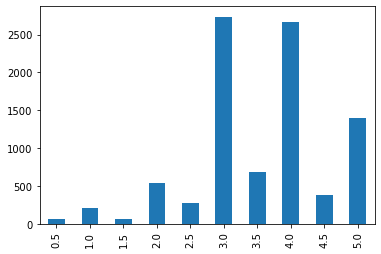

In [11]:
movies_df['rating'].value_counts().sort_index().plot(kind='bar')

In [12]:
movies_df['movie'].value_counts()

Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: movie, dtype: int64

<AxesSubplot:>

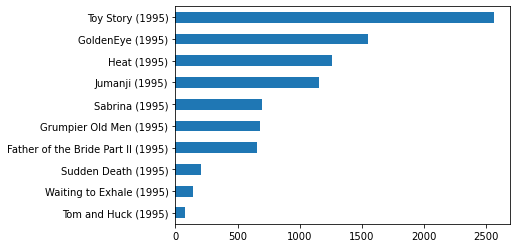

In [13]:
movies_df.movie.value_counts(ascending=True).plot(kind='barh')

In [14]:
movies_df.sort_values('userId')

,userId,movie,rating
2569,1,Jumanji (1995),3.5
3724,2,Grumpier Old Men (1995),4.0
0,3,Toy Story (1995),4.0
5204,4,Heat (1995),3.0
7444,4,GoldenEye (1995),4.0
...,...,...,...
6463,7117,Heat (1995),5.0
2567,7119,Toy Story (1995),5.0
2568,7120,Toy Story (1995),4.5
3723,7120,Jumanji (1995),4.0


In [14]:
user_movies_df = movies_df.pivot(index='userId',
                                 columns='movie',
                                 values='rating')

In [15]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [26]:
#Impute those NaNs with 0 values
user_movies_df.fillna(0, inplace=True)

In [27]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
3,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7044,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7070,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7080,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0
7087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [28]:
user_movies_df.index = movies_df['userId'].unique()

In [29]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
3,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7044,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7070,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7080,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0
7087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [30]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [31]:
user_sim = 1 - pairwise_distances(user_movies_df.values, metric='cosine')

In [32]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [33]:
np.fill_diagonal(user_sim, 0)

In [34]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [35]:
#Set the index and column names to user ids 
user_sim_df.index = movies_df['userId'].unique()
user_sim_df.columns = movies_df['userId'].unique()

In [27]:
user_sim_df

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [28]:
user_sim_df.iloc[0:10, 0:10]

,3,6,8,10,11,12,13,14,16,19
3,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.0,0.390567,0.707107,0.615457,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.0,0.650945,0.000000,0.492366,1.000000,0.874157
10,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.615457,0.000000,0.388514
11,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.0,0.390567,0.650945,0.000000,0.0,0.000000,0.736460,0.560880,0.650945,0.569028
13,0.0,0.707107,0.000000,0.000000,0.0,0.736460,0.000000,0.435194,0.000000,0.000000
14,0.0,0.615457,0.492366,0.615457,0.0,0.560880,0.435194,0.000000,0.492366,0.669519
16,0.0,0.000000,1.000000,0.000000,0.0,0.650945,0.000000,0.492366,0.000000,0.874157
19,0.0,0.000000,0.874157,0.388514,0.0,0.569028,0.000000,0.669519,0.874157,0.000000


In [29]:
user_sim_df.idxmax(axis=1)

3         11
6        168
8         16
10      4047
11         3
        ... 
7044      80
7070    1808
7080     708
7087       8
7105    4110
Length: 4081, dtype: int64

In [30]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:10]

3       11
6      168
8       16
10    4047
11       3
12    6676
13    5953
14    4138
16       8
19    3603
dtype: int64

In [31]:
user_sim_df.loc[6].idxmax()

168

In [32]:
movies_df[(movies_df['userId']==6) | (movies_df['userId']==168)]

,userId,movie,rating
1,6,Toy Story (1995),5.0
60,168,Toy Story (1995),4.5
3725,6,Grumpier Old Men (1995),3.0
6464,6,Sabrina (1995),5.0


In [33]:
user_1 = movies_df[movies_df['userId']==6]
user_1

,userId,movie,rating
1,6,Toy Story (1995),5.0
3725,6,Grumpier Old Men (1995),3.0
6464,6,Sabrina (1995),5.0


In [34]:
user_2 = movies_df[movies_df['userId']==168]
user_2

,userId,movie,rating
60,168,Toy Story (1995),4.5


In [35]:
user_1['movie']

1              Toy Story (1995)
3725    Grumpier Old Men (1995)
6464             Sabrina (1995)
Name: movie, dtype: object

In [36]:
user_2['movie']

60    Toy Story (1995)
Name: movie, dtype: object

In [37]:
pd.merge(user_1, user_2, on='movie', how='outer')

,userId_x,movie,rating_x,userId_y,rating_y
0,6,Toy Story (1995),5.0,168.0,4.5
1,6,Grumpier Old Men (1995),3.0,NaN,NaN
2,6,Sabrina (1995),5.0,NaN,NaN


In [38]:
#Considering the most similar customer
def recommend(custID):
    simID = user_sim_df.loc[custID].idxmax()
    simID_movies = movies_df[movies_df['userId'] == simID].movie
    custID_movies = movies_df[movies_df['userId'] == custID].movie
    return set(simID_movies) - set(custID_movies)

In [39]:
recommend(168)

{'Grumpier Old Men (1995)', 'Sabrina (1995)'}

In [40]:
recommend(6)

set()

In [42]:
movies_df.userId

0          3
1          6
2          8
3         10
4         11
        ... 
8987    7087
8988    7088
8989    7105
8990    7113
8991    7117
Name: userId, Length: 8992, dtype: int64

In [41]:
recommend(7087)

{'Grumpier Old Men (1995)', 'Heat (1995)', 'Toy Story (1995)'}

In [43]:
user_sim_df.sort_values(6, ascending = False).head(5)

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
2745,0.0,1.0,0.0,0.0,0.0,0.390567,0.707107,0.615457,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458831,0.0,0.0
168,0.0,1.0,0.0,0.0,0.0,0.390567,0.707107,0.615457,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458831,0.0,0.0
3423,0.0,1.0,0.0,0.0,0.0,0.390567,0.707107,0.615457,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458831,0.0,0.0
3456,0.0,1.0,0.0,0.0,0.0,0.390567,0.707107,0.615457,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458831,0.0,0.0
2129,0.0,1.0,0.0,0.0,0.0,0.390567,0.707107,0.615457,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458831,0.0,0.0


In [44]:
#Considering top 5 similar customers
def recommend_new(custID):
    simID = list(user_sim_df.sort_values(custID,ascending = False).head(5).index)
    simID_movies = [movies_df[movies_df['userId'] == each].movie for each in simID]
    simID_movies = np.concatenate(simID_movies)
    custID_movies = movies_df[movies_df['userId'] == custID].movie
    return set(simID_movies) - set(custID_movies)

In [45]:
recommend_new(7087)

{'Father of the Bride Part II (1995)',
 'Jumanji (1995)',
 'Sabrina (1995)',
 'Toy Story (1995)'}